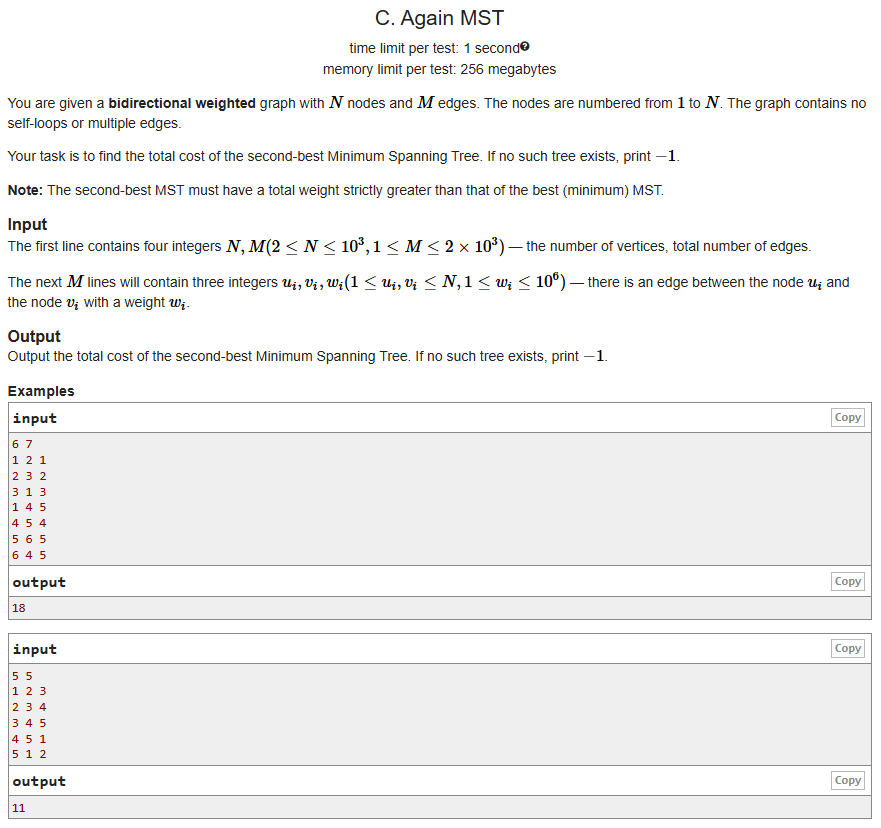

In [3]:
def SecondBestKruskal(N, M, edges):
  edges.sort()
  def kruskal(exclude_edge=None):
    parent_copy = list(range(N + 1))
    def find(u):
      while parent_copy[u] != u:
          parent_copy[u] = parent_copy[parent_copy[u]]
          u = parent_copy[u]
      return u

    total = 0
    mst_edges = []

    for i, (w, u, v) in enumerate(edges):
      if exclude_edge != None and i == exclude_edge:
        continue
      ru = find(u)
      rv = find(v)
      if ru != rv:
        parent_copy[rv] = ru
        total += w
        mst_edges.append((w, u, v))

    if len(mst_edges) != N - 1:
      return None
    return total

  best_mst = kruskal()
  if best_mst is None:
    return -1

  second_best = float('inf')
  parent_best = list(range(N + 1))

  def find_best(u):
    while parent_best[u] != u:
      parent_best[u] = parent_best[parent_best[u]]
      u = parent_best[u]
    return u

  mst_edge_ind = []
  for i, (w, u, v) in enumerate(edges):
    ru = find_best(u)
    rv = find_best(v)
    if ru != rv:
      parent_best[rv] = ru
      mst_edge_ind.append(i)

  for excl_edge in mst_edge_ind:
    curr_mst = kruskal(excl_edge)
    if curr_mst != None and best_mst < curr_mst < second_best:
      second_best = curr_mst

  non_mst_edges = [x for x in range(M) if x not in mst_edge_ind]
  for x in non_mst_edges:
    w, u, v = edges[x]
    temp_parent = list(range(N + 1))

    def find_temp(u):
      while temp_parent[u] != u:
        temp_parent[u] = temp_parent[temp_parent[u]]
        u = temp_parent[u]
      return u

    total = w
    temp_parent[u] = v

    for y in mst_edge_ind:
      wy, uy, vy = edges[y]
      ru = find_temp(uy)
      rv = find_temp(vy)
      if ru != rv:
        temp_parent[rv] = ru
        total += wy

    if best_mst < total < second_best:
      second_best = total

  return -1 if second_best == float('inf') else second_best

N, M = map(int, input().split())

edges = []
for x in range(M):
    u, v, w = map(int, input().split())
    edges.append((w, u, v))
print(SecondBestKruskal(N, M, edges))

5 5
1 2 3
2 3 4
3 4 5
4 5 1
5 1 2
11
